In [1]:
import pickle 
import pandas as pd
import numpy as np
#from plotnine import *
from hippie.parser.parser import *
%matplotlib inline
import numpy as np
from bhtsne import tsne
from plotnine import *

/home/lukas/miniconda3/envs/keras-theano/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
with open('P3_1511984095.247599out.pkl', 'rb') as fp:
    df = pickle.load(fp)
df.head()
#print(df)

,n_ants,evaporator.evaporation_rate,intensifier.pheromone_increase_rate,convergence_criterion.n_max_iterations,experiment_id,problem,optimize_value_cost,optimize_value_path,optimizer_instance
0,10,0.1,0.5,120,0,3.tsp,16037,"[57, 83, 27, 10, 69, 12, 14, 97, 146, 54, 59, ...",Optimizer with 10 ants.
0,10,0.1,0.5,120,1,3.tsp,16037,"[57, 83, 27, 10, 69, 12, 14, 97, 146, 54, 59, ...",Optimizer with 10 ants.
0,10,0.1,0.5,120,2,3.tsp,16037,"[57, 83, 27, 10, 69, 12, 14, 97, 146, 54, 59, ...",Optimizer with 10 ants.
0,10,0.1,0.5,120,3,3.tsp,16037,"[57, 83, 27, 10, 69, 12, 14, 97, 146, 54, 59, ...",Optimizer with 10 ants.
0,10,0.1,0.5,120,4,3.tsp,16037,"[57, 83, 27, 10, 69, 12, 14, 97, 146, 54, 59, ...",Optimizer with 10 ants.


In [3]:
df.dtypes

n_ants                                      int64
evaporator.evaporation_rate               float64
intensifier.pheromone_increase_rate       float64
convergence_criterion.n_max_iterations      int64
experiment_id                               int64
problem                                    object
optimize_value_cost                         int64
optimize_value_path                        object
optimizer_instance                         object
dtype: object

In [4]:
df.shape

(72, 9)

In [5]:
# http://www.blog.pyoung.net/2013/07/26/visualizing-the-traveling-salesman-problem-using-matplotlib-in-python/
# slightly modified

import matplotlib.pyplot as plt

def plotTSP(path, points, num_iters=1, color = 'g', paths=[]):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    
    """

    # Unpack the primary TSP path and transform it into a list of ordered 
    # coordinates

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])
    
    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]), 
                    head_width = a_scale, color = 'r', 
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color =color, length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = color, length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    #plt.xlim(0, max(x)*1.1)
    #plt.ylim(0, max(y)*1.1)

Cost: 10162


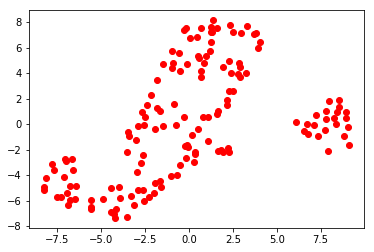

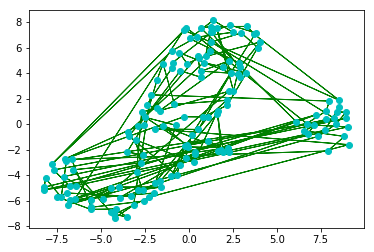

In [6]:
# Show Best


distance_matrix = parse_to_matrix("problems/travelling_salesman/data/3.tsp", dtype= np.float64)
points_tsne = tsne(distance_matrix)

           
min = df["optimize_value_cost"].min()
path = df[df["optimize_value_cost"] == min]['optimize_value_path'].min()
#print("Name: " + str(df['problem'][0]))
print("Cost: " + str(min))
#print("Points: " + str(points_tsne))
#print("Distance Matrix: " + str(distance_matrix))

plt.plot(*zip(*points_tsne),'ro')
plt.savefig('Problem_3_base.png')
plt.show()



plotTSP(path, points_tsne, 1, color='g', paths=[path])
plt.savefig(str(min)+'_Problem_3_best.png')
plt.show()

Cost: 16037
[57, 83, 27, 10, 69, 12, 14, 97, 146, 54, 59, 91, 50, 48, 11, 70, 106, 51, 147, 139, 62, 13, 93, 63, 56, 73, 26, 96, 16, 110, 125, 88, 100, 141, 123, 118, 81, 145, 58, 5, 47, 23, 129, 49, 92, 6, 104, 25, 102, 66, 143, 52, 113, 101, 124, 130, 84, 61, 115, 53, 116, 67, 30, 38, 148, 68, 135, 24, 78, 77, 75, 87, 137, 46, 82, 4, 107, 140, 7, 55, 74, 86, 120, 9, 90, 44, 45, 98, 142, 18, 15, 144, 22, 94, 8, 121, 79, 134, 2, 36, 41, 72, 20, 65, 114, 29, 35, 1, 149, 122, 119, 28, 127, 132, 33, 112, 117, 43, 37, 31, 76, 128, 71, 138, 80, 95, 85, 133, 21, 64, 111, 0, 60, 39, 89, 19, 108, 34, 109, 126, 42, 131, 103, 105, 136, 32, 99, 40, 3, 17]


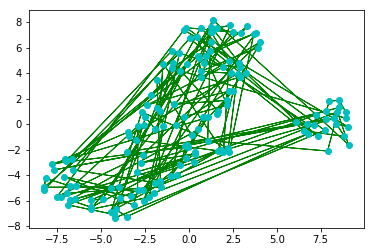

In [7]:
# Show Worst

# distance matrix to 2d points
#distance_matrix = parse_to_matrix("problems/travelling_salesman/data/1.tsp", dtype= np.float64)
#points_tsne = tsne(distance_matrix)

           
min = df["optimize_value_cost"].max()
path = df[df["optimize_value_cost"] == min]['optimize_value_path'].max()
print("Cost: " + str(min))
print(path)

plotTSP(path, points_tsne, 1, color='g', paths=[path])
plt.savefig(str(min)+'_Problem_3_worst.png')
plt.show()

(72, 3)


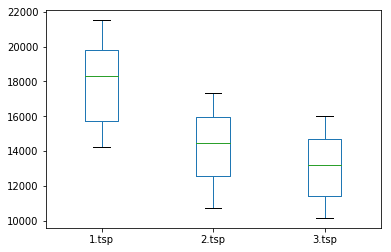

In [8]:
with open('P1_1511981995.003955out.pkl', 'rb') as fp:
    df = pickle.load(fp)
df.head()
costs1 = df["optimize_value_cost"]

with open('P2_1511983124.611429out.pkl', 'rb') as fp:
    df = pickle.load(fp)
df.head()
costs2 = df["optimize_value_cost"]

with open('P3_1511984095.247599out.pkl', 'rb') as fp:
    df = pickle.load(fp)
df.head()
costs3 = df["optimize_value_cost"]

costs = np.array([costs1, costs2, costs3])
costs = costs.T
print(costs.shape)
df = pd.DataFrame(costs, columns=['1.tsp','2.tsp','3.tsp'])
plt.savefig('boxplot')
df.plot.box()